<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/4_Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
H=np.zeros((dimension,dimension))
magnetization=[]
up='1'
down='0'
z='0'*N
for a in range(dimension):
        state_chain=bin(a)[2:] 
        l=len(state_chain)
        state_chain=z[0:N-l]+state_chain         
        magnetization.append(((state_chain.count('1')-state_chain.count('0'))/N))

In [ ]:
def diagonalization(J,h,N):
    dimension=2**N
    H=np.zeros((dimension,dimension))


    for a in range(dimension):
        state_chain=bin(a)[2:] 
        l=len(state_chain)
        state_chain=z[0:N-l]+state_chain 
        
        for i in range(N):
            j=np.mod(i+1,N)
 
            if state_chain[i]==state_chain[j]:
                H[a,a]-=J
#            
            else:                              
                H[a,a]+=J
            
            
            
            if state_chain[i]=='1':
                state_chain1=state_chain[0:i]+down+state_chain[i+1:]
                b=int(state_chain1,2)
                H[a,b]-=h
            
            else:
                state_chain1=state_chain[0:i]+up+state_chain[i+1:]
                b=int(state_chain1,2)
                H[a,b]-=h
            
    eig_value=np.real(np.linalg.eig(H)[0])
    eig_vec=np.real(np.linalg.eig(H)[1])# eigen_values  # eigenstates
    idx_sorted1 = np.argsort(eig_value)
    eig_value=eig_value[idx_sorted1]
    eig_vec=eig_vec[:,idx_sorted1]
    energy_level=np.sort(eig_value)[0:50]
    ground_energy=energy_level[0]
    ground_vec=eig_vec[:,0]
    for i in range(len(energy_level)):
        energy_level[i]=energy_level[i]-ground_energy
            

    return energy_level,ground_vec

In [ ]:
def statistical_m(ground_wave):
    m_average=0
    m_square=0
    for i in range(dimension):
        m_average+=(ground_wave[i]**2)*abs(magnetization[i])
        m_square+=(ground_wave[i]**2)*(magnetization[i]**2)
        
    return m_average,m_square

In [ ]:
h_list=np.linspace(0,2,41)
A=np.zeros((50,len(h_list)))
m_m=[]
m_s=[]
for i in range(len(h_list)):

    energy_level,ground_wave=diagonalization(1,h_list[i],10)
    m_average,m_square = statistical_m(ground_wave)
    A[:,i]=energy_level
    m_m.append(m_average)
    m_s.append(m_square)

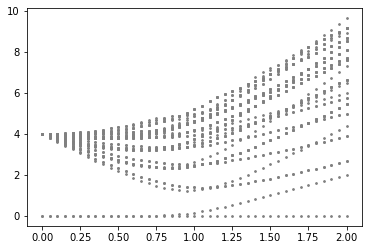

In [ ]:
for i in range(len(energy_level)):
    
    plt.scatter(h_list,A[i,:],color='gray',s=3)

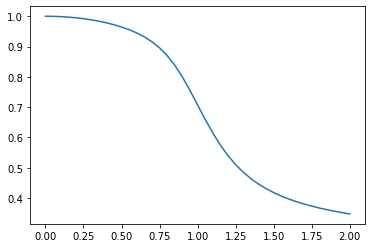

In [ ]:
plt.plot(h_list,m_m)
plt.show()

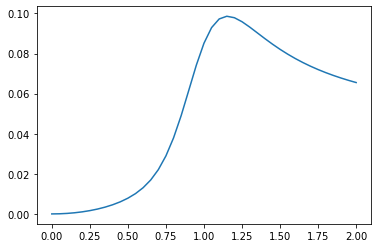

In [ ]:
m_variance=[]
for i in range(len(h_list)):
    m_variance.append(m_s[i]-m_m[i]**2)

plt.plot(h_list,m_variance)
plt.show()